# reduce data

In [2]:
import numpy as np
solution0 = np.load("data/data0.npy", allow_pickle=True)

In [16]:
solution0_small=solution0[:100]
solution1_small=solution0[100:200]
with open('data/data_sample0.npy', 'wb') as f:
    np.save(f, solution0_small)
with open('data/data_sample1.npy', 'wb') as f:
    np.save(f, solution1_small)

In [8]:
solution0_small.astype(np.float32).dtype

dtype('float32')

In [11]:
with open('data/data_sample.npy', 'wb') as f:
    np.save(f, solution0_small)

In [12]:
with open('data/data_sample32.npy', 'wb') as f:
    np.save(f, solution0_small.astype(np.float32))

In [3]:
with open('data/data0_sample16.npy', 'wb') as f:
    np.save(f, solution0[:1000].astype(np.float16))
with open('data/data1_sample16.npy', 'wb') as f:
    np.save(f, solution0[1000:2000].astype(np.float16))

# visualize data

In [3]:
import numpy as np
solution = np.load("data/data_sample.npy", allow_pickle=True)
solution.shape

(200, 2, 512, 512)

In [14]:
import cv2
min_val, max_val = solution.min(), solution.max()
scaled_array = ((solution - min_val) / (max_val - min_val) * 255).astype(np.uint8)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
video1 = cv2.VideoWriter('video1.mp4', fourcc, 30, (512, 512))  # 30 fps
video2 = cv2.VideoWriter('video2.mp4', fourcc, 30, (512, 512))  # 30 fps

# Write each frame from the array to the respective videos
for i in range(scaled_array.shape[0]):
    frame1 = scaled_array[i, 0]  # First channel for video1
    frame2 = scaled_array[i, 1]  # Second channel for video2
    
    # Convert frames to BGR (required by OpenCV for video writing)
    frame1_bgr = cv2.cvtColor(frame1, cv2.COLOR_GRAY2BGR)
    frame2_bgr = cv2.cvtColor(frame2, cv2.COLOR_GRAY2BGR)
    
    video1.write(frame1_bgr)
    video2.write(frame2_bgr)

# Release video writers
video1.release()
video2.release()

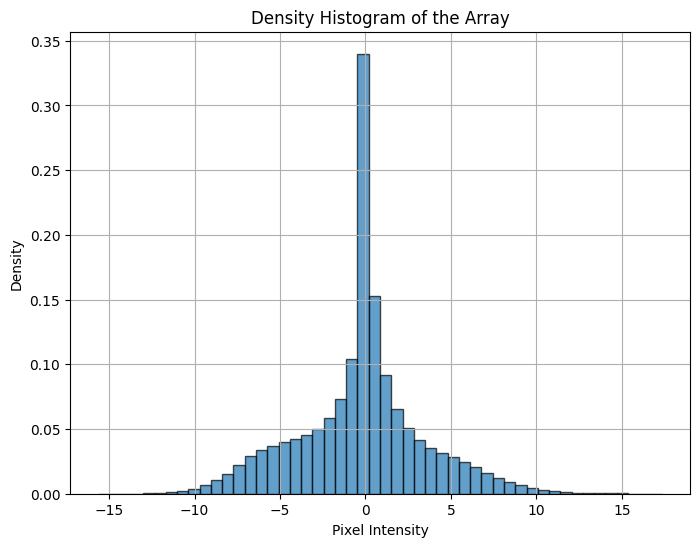

In [11]:
flattened_array = solution[:,1,:,:].flatten()
import matplotlib.pyplot as plt
# Plot the density histogram
plt.figure(figsize=(8, 6))
plt.hist(flattened_array, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.title('Density Histogram of the Array')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()